# Packages Loading

In [31]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pandas as pd

from data_loading import read_hackathon_data
from data_preprocessing import MetricsProcessor


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read Data

In [32]:
path = Path("data_config.yaml")
df_hack = read_hackathon_data(path, attach_users=True)
df_hack.head()


,id,ip_address,time,session_id,kernel_id,notebook_name,event,cell_index,cell_num,cell_type,cell_source,cell_output,expert,user_id
0,10,None,2023-05-06T08:30:38.037Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,save_notebook,None,NaN,None,"[\n {\n ""id"": ""e4836a849dea49f1a753df2274f...",None,False,4
1,17,192.168.1.56,2023-05-06T08:31:35.929Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,execute,e4836a849dea49f1a753df2274fbdbc5,0.0,code,# # Do not forget to check if your notebook lo...,None,False,4
2,18,192.168.1.56,2023-05-06T08:31:35.944Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,create,dbcf462e8f6c4e3a89c0d6d0d083c0b2,0.0,code,None,None,False,4
3,19,192.168.1.56,2023-05-06T08:31:36.049Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,finished_execute,e4836a849dea49f1a753df2274fbdbc5,1.0,code,# # Do not forget to check if your notebook lo...,"[{""output_type"":""stream"",""size"":23}]",False,4
4,41,192.168.1.56,2023-05-06T08:37:46.346Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,execute,dbcf462e8f6c4e3a89c0d6d0d083c0b2,1.0,code,!ls data/task1,None,False,4


# Initialize Metrics Processor

In [33]:
processor = MetricsProcessor()


# Metrics Calculation

In [34]:
graph_metrics = processor.calculate_graph_metrics(df_hack)
graph_metrics.head()


100%|██████████| 46/46 [00:02<00:00, 18.76it/s]


,kernel_id,modularity,average_degree,average_clustering
0,033a2c63-4cfb-4cc5-9988-59c48a06eb23,0.584378,5.071429,0.161154
1,1d8c1c38-d342-4950-9667-f8b9872d71b7,0.441828,11.157895,0.078947
2,232bcb48-7455-4109-9eeb-809649a6bedc,0.474784,12.985507,0.287237
3,29da7c56-5a69-485f-b181-a0a7199a559c,0.572181,7.943396,0.143793
4,2bc4e2c9-833e-454f-8c6c-2dff1e6e60e9,0.517000,5.037037,0.342387


In [35]:
cells_metrics = processor.calculate_cell_metrics(df_hack)
cells_metrics.head()


,id,ip_address,time,session_id,kernel_id,notebook_name,event,cell_index,cell_num,cell_type,cell_source,cell_output,expert,user_id,objects,sloc,ccn
0,10,None,2023-05-06T08:30:38.037Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,save_notebook,None,NaN,None,"[\n {\n ""id"": ""e4836a849dea49f1a753df2274f...",None,False,4,NaN,NaN,NaN
1,17,192.168.1.56,2023-05-06T08:31:35.929Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,execute,e4836a849dea49f1a753df2274fbdbc5,0.0,code,# # Do not forget to check if your notebook lo...,None,False,4,1.0,2.0,1.0
2,18,192.168.1.56,2023-05-06T08:31:35.944Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,create,dbcf462e8f6c4e3a89c0d6d0d083c0b2,0.0,code,None,None,False,4,NaN,NaN,NaN
3,19,192.168.1.56,2023-05-06T08:31:36.049Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,finished_execute,e4836a849dea49f1a753df2274fbdbc5,1.0,code,# # Do not forget to check if your notebook lo...,"[{""output_type"":""stream"",""size"":23}]",False,4,NaN,NaN,NaN
4,41,192.168.1.56,2023-05-06T08:37:46.346Z,a7b38785-5e80-4d1b-9722-6673e4c78877,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,task1.ipynb,execute,dbcf462e8f6c4e3a89c0d6d0d083c0b2,1.0,code,!ls data/task1,None,False,4,0.0,1.0,1.0


In [38]:
notebooks_metrics = processor.calculate_notebook_metrics(df_hack)
notebooks_metrics.head()


,kernel_id,snap_num,cell_count,objects_mean,objects_sum,sloc_mean,sloc_sum,ccn_mean,ccn_sum,event
0,0033f76c-6179-4fb4-a9ce-79112a52b51c,0,1,1.000000,1.0,2.000000,2.0,1.0,1.0,execute
1,0033f76c-6179-4fb4-a9ce-79112a52b51c,1,1,1.000000,1.0,2.000000,2.0,1.0,1.0,finished_execute
2,0033f76c-6179-4fb4-a9ce-79112a52b51c,2,11,0.909091,10.0,2.636364,29.0,1.0,11.0,save_notebook
3,0033f76c-6179-4fb4-a9ce-79112a52b51c,3,11,0.909091,10.0,2.636364,29.0,1.0,11.0,execute
4,0033f76c-6179-4fb4-a9ce-79112a52b51c,4,11,0.909091,10.0,2.636364,29.0,1.0,11.0,finished_execute


# Transitions between cells

In [48]:
transitions = processor.get_execution_transitions(df_hack[:200])
transitions.head()


100%|██████████| 3/3 [00:02<00:00,  1.09it/s]


,kernel_id,cell_idx_from,cell_num_from,cell_source_from,cell_idx_to,cell_num_to,cell_source_to,inner_transition,changes
0,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,e4836a849dea49f1a753df2274fbdbc5,0.0,# # Do not forget to check if your notebook lo...,dbcf462e8f6c4e3a89c0d6d0d083c0b2,1.0,!ls data/task1,False,[]
1,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,dbcf462e8f6c4e3a89c0d6d0d083c0b2,1.0,!ls data/task1,dbcf462e8f6c4e3a89c0d6d0d083c0b2,1.0,!ls,True,[Move(target_node=ASTNode(type=expression_stat...
2,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,dbcf462e8f6c4e3a89c0d6d0d083c0b2,1.0,!ls,dbcf462e8f6c4e3a89c0d6d0d083c0b2,1.0,!ls,True,[]
3,5c2e86ab-cd96-4e48-98bc-28ed10fa8aac,dbcf462e8f6c4e3a89c0d6d0d083c0b2,1.0,!ls,dbcf462e8f6c4e3a89c0d6d0d083c0b2,1.0,"""checking""",True,"[Insert(target_node=IN(type=root), node=('modu..."
4,bc147b33-fa74-4bff-9f48-c88809c5bdcd,35c0b3b694f84140846a21197ea62f68,0.0,from mining_extension import check_logging \nc...,35c0b3b694f84140846a21197ea62f68,0.0,from mining_extension import check_logging \nc...,True,[]


# Complexity evolution

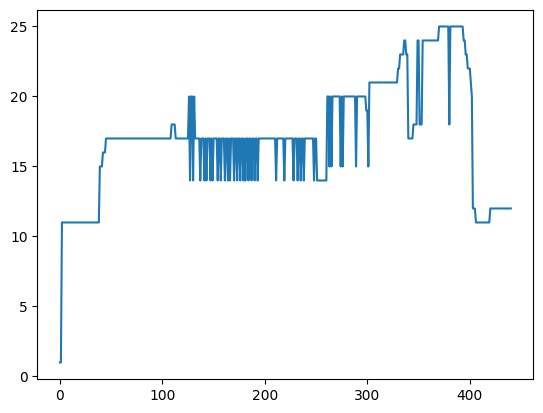

In [44]:
fig, ax = plt.subplots()

ax.plot(notebooks_metrics.groupby('kernel_id').get_group("0033f76c-6179-4fb4-a9ce-79112a52b51c").ccn_sum)


In [45]:
# fig, ax = plt.subplots(1, 2, figsize=(2 * 8, 5))
#
# complexities_dict = complexities_dict_sum
# interpolation_size = 1000
# xp = np.linspace(0, 1, interpolation_size)
# key = 'objects'
#
# dd = {'task1': 0, 'task2': 1}
# mn, mx = np.inf, -np.inf
#
# for group, ids in groups_mapping.items():
#     agg = np.zeros(interpolation_size)
#     for idx in ids:
#         d = complexities_dict[idx]
#         y = np.array(d[key])
#         y[np.isnan(y)] = 0
#         x = np.linspace(0, 1, len(y))
#
#         y = np.interp(xp, x, y) + 1e-5
#         if y.min() < mn:
#             mn = y.min()
#         if y.max() > mx:
#             mx = y.max()
#
#         ax[dd[group]].plot(xp, y, color='k', alpha=0.2)
#         agg += y
#
#     ax[dd[group]].set_title(group)
#     ax[dd[group]].set_ylabel(key)
#     ax[dd[group]].plot(xp, agg / len(ids), c='r', lw=2, label='average')
#     ax[dd[group]].axhline((agg / len(ids))[-1], color='k', ls=(0, (5, 5)))
#     ax[dd[group]].legend()
#
# for axi in ax:
#     axi.set_ylim(mn*0.9, mx*1.1)
#
